In [1]:
# Scipy es la librería matemática.
# Incluye una enorme cantidad de módulos y operaciones.

# Tomado de: https://docs.scipy.org/doc/scipy/tutorial/stats.html

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

# Estadística.
from scipy import stats

0.05399096651318806
0.9772498680518208


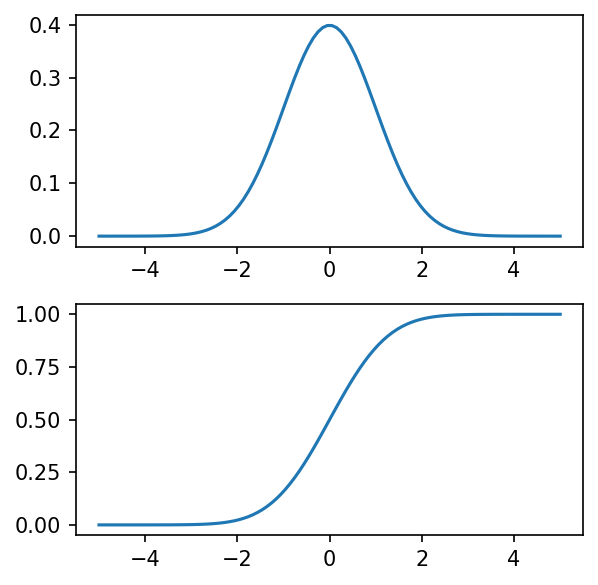

In [2]:
# Distribución normal.

# Incializamos gráfica.
fig, ax = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

x = np.linspace(-5, 5, 100)

# PDF: función de densidad de probabilidad.
ax[0].plot(x, stats.norm.pdf(x))
# CDF: función de probabilidad acumulada.
ax[1].plot(x, stats.norm.cdf(x))

# También es posible obtener un solo valor.
print(stats.norm.pdf(2))
print(stats.norm.cdf(2))

fig.tight_layout()
plt.show()

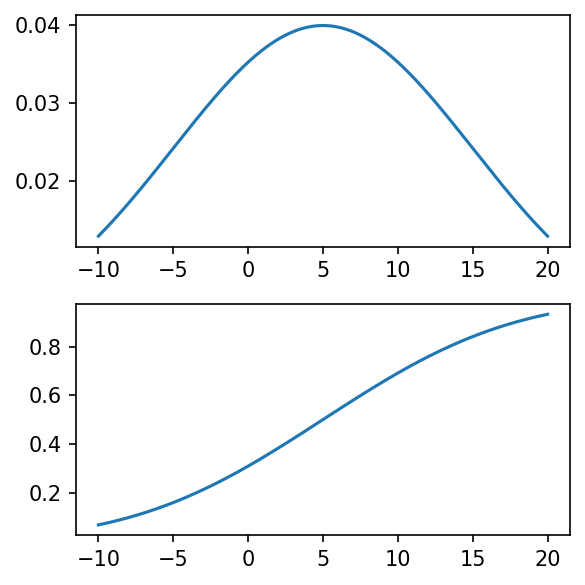

In [3]:
# Distribución normal con parámetros.

# Incializamos gráfica.
fig, ax = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

x = np.linspace(-10, 20, 1000)


# Media.
mu = 5
# Desviación estándar.
sigma = 10

ax[0].plot(x, stats.norm.pdf(x, loc = mu, scale = sigma))
ax[1].plot(x, stats.norm.cdf(x, loc = mu, scale = sigma))

fig.tight_layout()
plt.show()

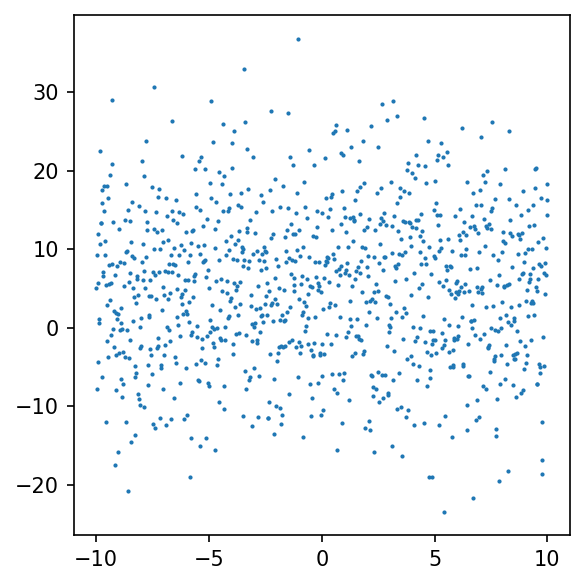

In [4]:
# Variables aleatorias.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

# Media.
mu = 5
# Desviación estándar.
sigma = 10

x = np.linspace(-10, 10, 1000)
r = stats.norm.rvs(size = 1000, loc = mu, scale = sigma,
    random_state = np.random.default_rng(np.random.SeedSequence().entropy) )

ax.scatter(x, r, s = 1)

fig.tight_layout()
plt.show()

-2.3263478740408408
0.0
0.8416212335729143


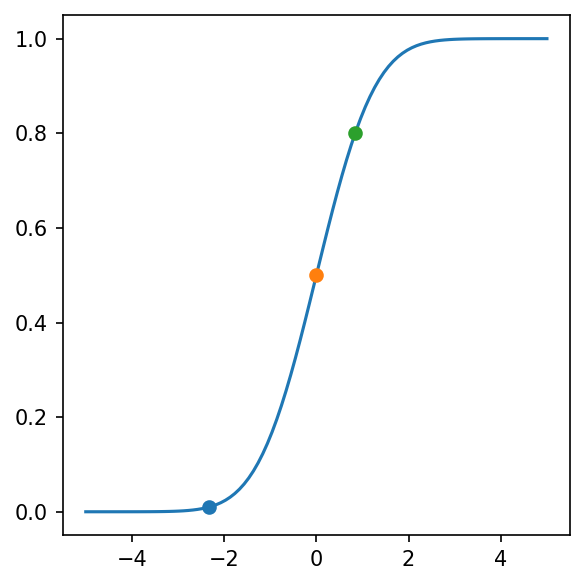

In [5]:
# Percentiles.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

x = np.linspace(-5, 5, 100)

ax.plot(x, stats.norm.cdf(x), zorder = 0)

ax.scatter(stats.norm.ppf(0.01), 0.01)
ax.scatter(stats.norm.ppf(0.5 ), 0.5)
ax.scatter(stats.norm.ppf(0.8 ), 0.8)

print(stats.norm.ppf(0.01))
print(stats.norm.ppf(0.50))
print(stats.norm.ppf(0.80))

fig.tight_layout()
plt.show()

In [6]:
# Estadísticos.

est = stats.norm.stats(loc = mu, scale = sigma, moments = "mvsk")
names = ["media   ", "varianza", "sesgo   ", "curtosis"]

print(f"{names[0]}: {est[0]:7.3f}")
print(f"{names[1]}: {est[1]:7.3f}")
print(f"{names[2]}: {est[2]:7.3f}")
print(f"{names[3]}: {est[3]:7.3f}")

media   :   5.000
varianza: 100.000
sesgo   :   0.000
curtosis:   0.000


1
a


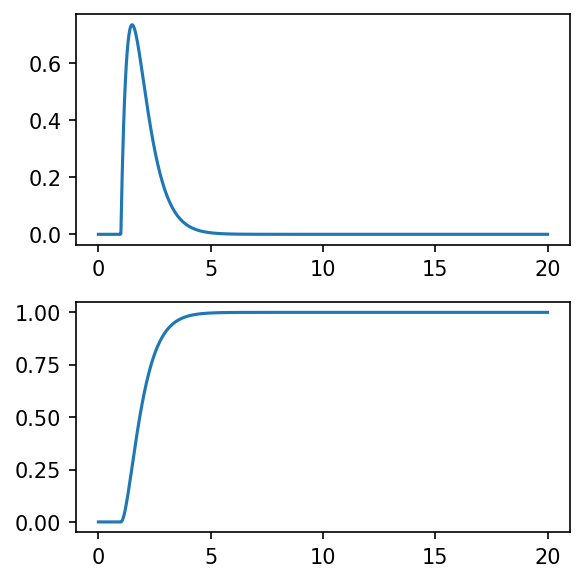

In [7]:
# Distribución gamma.

# Todas las distribuciones continuas tienen escala y ubicación.
# Podemos saber cuántos parámetros adicionales hay.
print( stats.gamma.numargs )
print( stats.gamma.shapes )

# Incializamos gráfica.
fig, ax = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

x = np.linspace(0, 20, 1000)

loc = 1
beta = 2
a = 2
scale = 1 / beta

# PDF: función de densidad de probabilidad
ax[0].plot(x, stats.gamma.pdf(x, a = a, loc = loc, scale = scale))
# CDF: función de probabilidad acumulada.
ax[1].plot(x, stats.gamma.cdf(x, a = a, loc = loc, scale = scale))

fig.tight_layout()
plt.show()

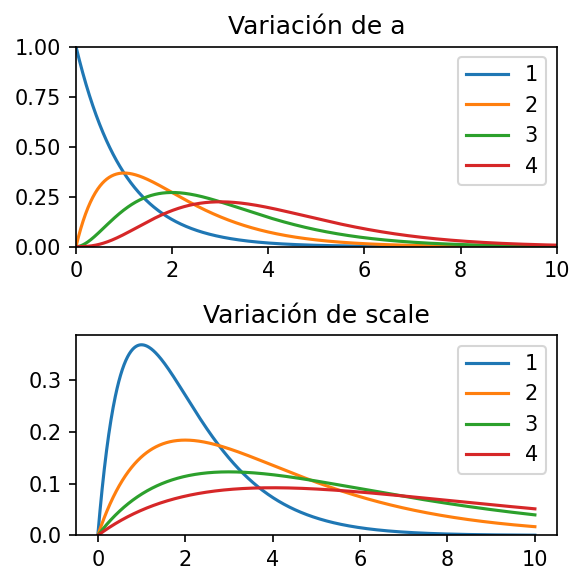

In [8]:
# Distribución gamma.

# Incializamos gráfica.
fig, ax = plt.subplots(2)
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

x = np.linspace(0, 10, 1000)

a = [1, 2, 3, 4]
s = [1, 2, 3, 4]

ax[0].plot(x, stats.gamma.pdf(x, a = a[0]))
ax[0].plot(x, stats.gamma.pdf(x, a = a[1]))
ax[0].plot(x, stats.gamma.pdf(x, a = a[2]))
ax[0].plot(x, stats.gamma.pdf(x, a = a[3]))

ax[1].plot(x, stats.gamma.pdf(x, a = 2, scale = s[0]))
ax[1].plot(x, stats.gamma.pdf(x, a = 2, scale = s[1]))
ax[1].plot(x, stats.gamma.pdf(x, a = 2, scale = s[2]))
ax[1].plot(x, stats.gamma.pdf(x, a = 2, scale = s[3]))

# Estilo.
ax[0].set_ylim(0, 1)
ax[1].set_ylim(0)
ax[0].set_xlim(0, 10)
ax[0].set_xlim(0, 10)

ax[0].legend(a)
ax[1].legend(s)

ax[0].set_title("Variación de a")
ax[1].set_title("Variación de scale")

fig.tight_layout()
plt.show()

mu: -0.001, sigma: 0.999


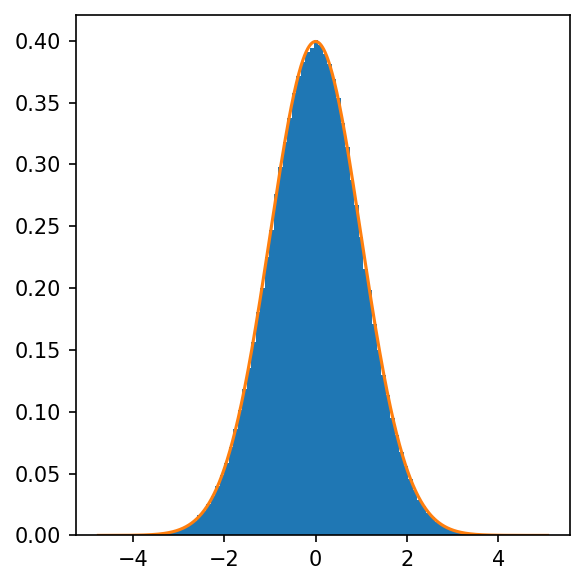

In [10]:
# Ajuste de distribución

# Datos aleatorios.
n = np.random.randn(1000000)

mu, sigma = stats.norm.fit(n)

print(f"mu: {mu:.3f}, sigma: {sigma:.3f}")

# Distribución ajustada
x = np.linspace(n.min(), n.max(), 1000000)

# Es posible inicializar una distribución con sus parámetros
dist_n = stats.norm(loc = mu, scale = sigma)
y = dist_n.pdf(x)

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

# Histograma
ax.hist(n, density = True, bins = 100)
# Distribución ajustada.
ax.plot(x, y)

fig.tight_layout()
plt.show()

In [11]:
# Prueba t de Student para el ajuste de la media.
# p debe ser lo más alto posible en este caso,
# muchas veces se establece el nivel de confianza de 0.95.

# valor ligeramente diferente de la media real
Student = stats.ttest_1samp(n, -.002)
print( Student )
print( f"p: {Student.pvalue:.3f}" )
print()

# media real
Student = stats.ttest_1samp(n, mu)
print( Student )

Ttest_1sampResult(statistic=0.9650224438680906, pvalue=0.3345338037561767)
p: 0.335

Ttest_1sampResult(statistic=0.0, pvalue=1.0)


(-4.757585184354829, 4.756549236268798)
-0.0010359480860309134
Ttest_1sampResult(statistic=3.6726337454299647e-13, pvalue=0.9999999999997069)


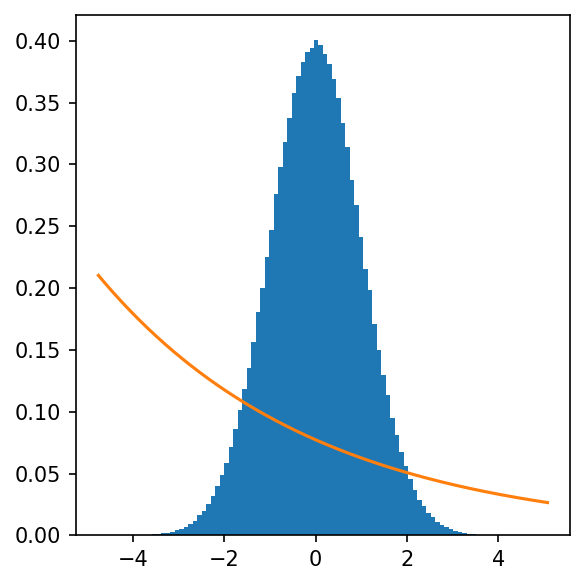

In [12]:
# Ahora ajustamos una distribución Exponencial.
param = stats.expon.fit(n)
print(param)

# *lista separa los elementos como argumentos de una función.
# equivalente a stats.expon(param[0], param[1])
dist_e = stats.expon(*param)
m = dist_e.stats("m")
print(m)

Student = stats.ttest_1samp(n, m)
print( Student )

# Distribución ajustada
x = np.linspace(n.min(), n.max(), 1000000)
y = dist_e.pdf(x)

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

# Histograma
ax.hist(n, density = True, bins = 100)
# Distribución ajustada.
ax.plot(x, y)

fig.tight_layout()
plt.show()

KstestResult(statistic=0.0006931155438985037, pvalue=0.722387699897368)
KstestResult(statistic=0.43016205763146625, pvalue=0.0)


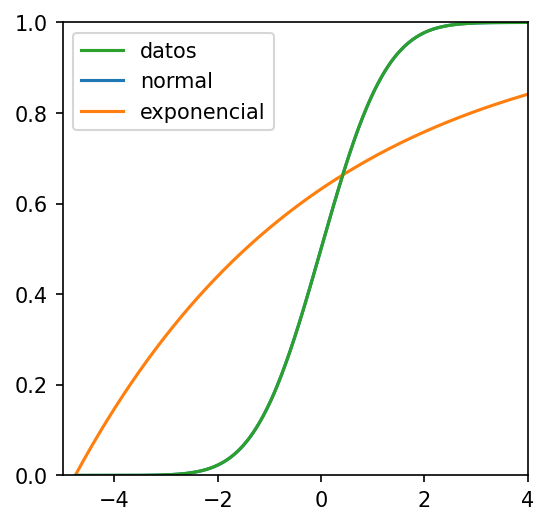

In [13]:
# Prueba Kolmogorov Smirnoff de bondad de ajuste a la distribución.
# Es parecida a la prueba CHI cuadrada pero sin requeridad muestrear la
# distribución continua, se trabaja con la probabilidad acumulada.

# Normal
print(stats.kstest(n, dist_n.cdf))

# Exponencial
print(stats.kstest(n, dist_e.cdf))

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

# Frecuencias acumuladas.
normal, = ax.plot(x, dist_n.cdf(x))
expon, = ax.plot(x, dist_e.cdf(x))

# Graficamos los datos acumulados.
# el argumento en y es i / N, con i = 1, 2, ..., N, N: cantidad de datos.
datos, = ax.plot(np.sort(n), np.array( range(1, len(n) + 1) )
    / ( len(n) + 1 ), drawstyle = "steps")

# Estilo.
ax.legend([datos, normal, expon], ["datos", "normal", "exponencial"])
ax.set_ylim(0, 1)
ax.set_xlim(-5, 4)

plt.show()

LinregressResult(slope=0.00415050859198283, intercept=0.03557285415893394, rvalue=0.004150218638872576, pvalue=0.8957137190534125, stderr=0.03165638578167411, intercept_stderr=0.03142004231696946)


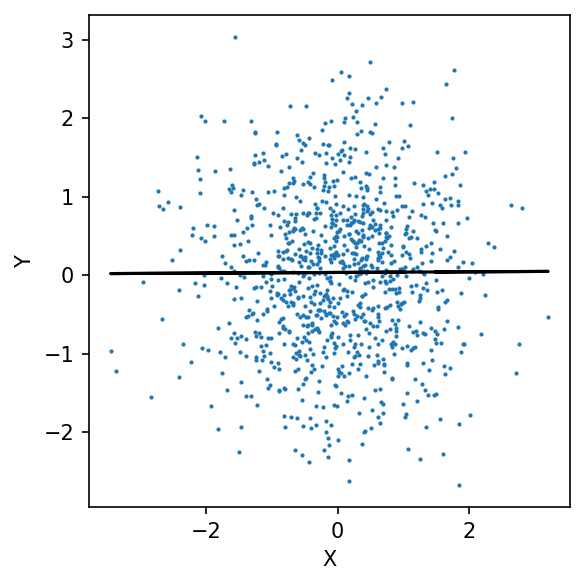

In [14]:
# Regresión lineal.

# Incializamos gráfica.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150) 

# Creamos un dataframe aleatorio.
df = pd.DataFrame(np.random.randn(1000,2), columns = ["X", "Y"])

# Regresión
reg = stats.linregress(df)
# el valor p se refiere a la hipótesis nula donde la pendiente es 0.
# En este caso queremos que p sea menor al valor de confianza, 0.05.
print(reg)
y = reg.intercept + df["X"] * reg.slope

df.plot("X", "Y", ax = ax, kind = "scatter", s = 1)
ax.plot(df["X"], y, color = "k")

fig.tight_layout()
plt.show()

In [15]:
# del archivo de consumo eléctrico, selecciona el consumo en tarifa DAC
# para todos los municipios. Con esos datos, para el 2010 ajusta
# la distribución normal, gamma, beta, y chi cuadrada.
# Haz las pruebas de media y bondad de ajuste
# Haz una regresión lineal entre los datos de 2012 y 2014.